Group 17

team member: Ali Shah, Arsalan Aman, Ping Chun Lee


In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data preparation

In [ ]:
# retrieve Bitcoin price data from cryptocomare website
endpoint = 'https://min-api.cryptocompare.com/data/v2/histoday'
response = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=1999&api_key=346a5653477eed39d369f3b05523c27a427a45ab31125be8a8dbf06cf4478d49')

# save to dataframe type
dataTable = pd.DataFrame(json.loads(response.content)['Data']['Data'])

# convert time to timestamp type and set it as index
dataTable = dataTable.set_index('time')
dataTable.index = pd.to_datetime(dataTable.index, unit='s')

# drop unuseless variables
dataTable.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

# create total volume variables
dataTable['volume'] = dataTable.volumefrom + dataTable.volumeto

dataTable.head()

,high,low,open,volumefrom,volumeto,close,volume
time,,,,,,,
2017-05-17,1842.83,1703.97,1729.34,94618.69,1.709542e+08,1801.30,1.710488e+08
2017-05-18,1980.49,1791.12,1801.30,73095.54,1.359019e+08,1880.99,1.359750e+08
2017-05-19,1969.70,1875.28,1880.99,98759.13,1.915239e+08,1962.00,1.916227e+08
2017-05-20,2048.45,1944.40,1962.00,89862.03,1.793469e+08,2040.18,1.794368e+08
2017-05-21,2094.94,1980.07,2040.18,78775.32,1.610368e+08,2044.19,1.611156e+08


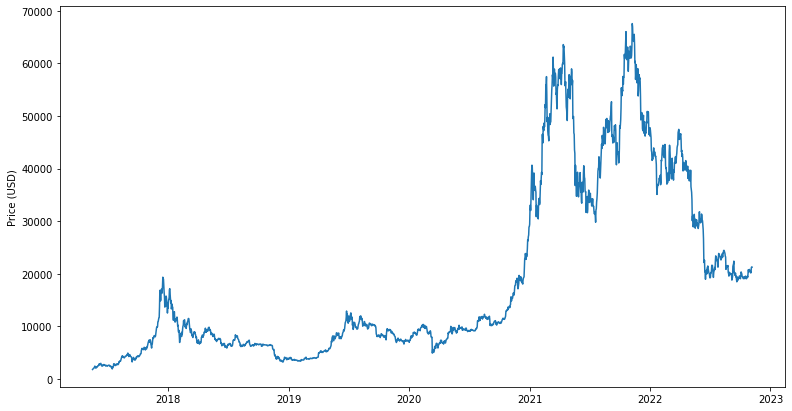

In [ ]:
# show price trend plot
plt.figure(figsize=(13, 7))
plt.ylabel("Price (USD)")
plt.plot(dataTable.close)

# feature creation

In [ ]:
# create dataframe to store new features from the source data
features = pd.DataFrame(index=dataTable.index).sort_index()

# feature 1: daily price rate
features['f1'] = dataTable.close/dataTable.open-1
features.head()

,f1
time,
2017-05-17,0.041611
2017-05-18,0.044240
2017-05-19,0.043068
2017-05-20,0.039847
2017-05-21,0.001966


In [ ]:
# feature 2: apply log to volume
features['f2'] = dataTable.volume.apply(np.log)

# feature 3: difference per day
features['f3'] = dataTable.volume.diff()

# feature 4: difference per week
features['f4'] = dataTable.volume.diff(7)

# feature 5: difference per month (approximation)
features['f5'] = dataTable.volume.diff(30)

# feature 6: daily change rate
features['f6'] = dataTable.volume.pct_change()

# feature 7: weekly change rate
features['f7'] = dataTable.volume.pct_change(7)

# feature 8: monthly change rate
features['f8'] = dataTable.volume.pct_change(30)

features.tail()

,f1,f2,f3,f4,f5,f6,f7,f8
time,,,,,,,,
2022-11-02,-0.016110,21.344593,8.640721e+08,-5.917891e+08,7.548839e+08,0.866389,-0.241233,0.682218
2022-11-03,0.002861,20.814719,-7.656315e+08,-7.173775e+08,-1.948918e+08,-0.411321,-0.395654,-0.151002
2022-11-04,0.046645,21.435110,9.419801e+08,4.400779e+08,8.421741e+08,0.859654,0.275450,0.704411
2022-11-05,0.007138,20.375450,-1.331517e+09,-5.134882e+08,-7.966879e+08,-0.653426,-0.420990,-0.530094
2022-11-06,-0.001801,19.499225,-4.121896e+08,-5.035866e+08,-8.838518e+08,-0.583649,-0.631357,-0.750368


In [ ]:
# feature 9: log of 7 day moving average of volume
features['f9']=dataTable.volume.rolling(7).mean().apply(np.log)

# feature 10: log of 30 day moving average of volume
features['f10']=dataTable.volume.rolling(30).mean().apply(np.log)

# feature 11: daily volume vs. 200 day moving average
features['f11']=dataTable.volume/dataTable.volume.rolling(200).mean()-1

# feature 12: daily closing price vs. 50 day exponential moving avg
features['f12']=dataTable.close/dataTable.close.ewm(span=50).mean()-1

features.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
time,,,,,,,,,,,,
2022-11-02,-0.016110,21.344593,8.640721e+08,-5.917891e+08,7.548839e+08,0.866389,-0.241233,0.682218,21.033640,20.847222,0.699355,0.008055
2022-11-03,0.002861,20.814719,-7.656315e+08,-7.173775e+08,-1.948918e+08,-0.411321,-0.395654,-0.151002,20.955530,20.841467,-0.002838,0.010506
2022-11-04,0.046645,21.435110,9.419801e+08,4.400779e+08,8.421741e+08,0.859654,0.275450,0.704411,21.004166,20.866103,0.846509,0.055256
2022-11-05,0.007138,20.375450,-1.331517e+09,-5.134882e+08,-7.966879e+08,-0.653426,-0.420990,-0.530094,20.947182,20.842813,-0.359869,0.060178
2022-11-06,-0.001801,19.499225,-4.121896e+08,-5.035866e+08,-8.838518e+08,-0.583649,-0.631357,-0.750368,20.887954,20.816323,-0.732536,0.055856


In [ ]:
# feature 13: get the z score for every 200 data points
features['f13']=(dataTable.close - dataTable.close.rolling(window=200, min_periods=20).mean()) / dataTable.close.rolling(window=200, min_periods=200).std()

features.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
time,,,,,,,,,,,,,
2022-11-02,-0.016110,21.344593,8.640721e+08,-5.917891e+08,7.548839e+08,0.866389,-0.241233,0.682218,21.033640,20.847222,0.699355,0.008055,-0.671825
2022-11-03,0.002861,20.814719,-7.656315e+08,-7.173775e+08,-1.948918e+08,-0.411321,-0.395654,-0.151002,20.955530,20.841467,-0.002838,0.010506,-0.656367
2022-11-04,0.046645,21.435110,9.419801e+08,4.400779e+08,8.421741e+08,0.859654,0.275450,0.704411,21.004166,20.866103,0.846509,0.055256,-0.496872
2022-11-05,0.007138,20.375450,-1.331517e+09,-5.134882e+08,-7.966879e+08,-0.653426,-0.420990,-0.530094,20.947182,20.842813,-0.359869,0.060178,-0.464812
2022-11-06,-0.001801,19.499225,-4.121896e+08,-5.035866e+08,-8.838518e+08,-0.583649,-0.631357,-0.750368,20.887954,20.816323,-0.732536,0.055856,-0.464127


# analysis

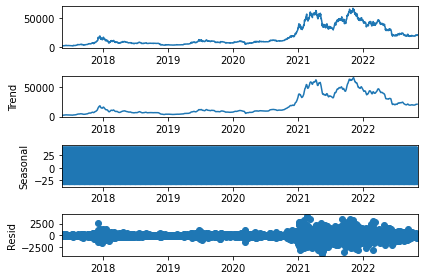

In [ ]:
# check seasonal trend
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = dataTable[['close']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

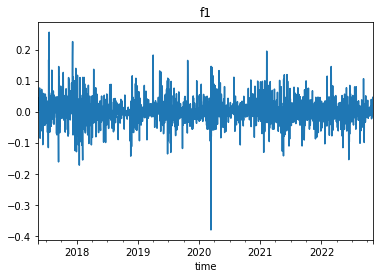

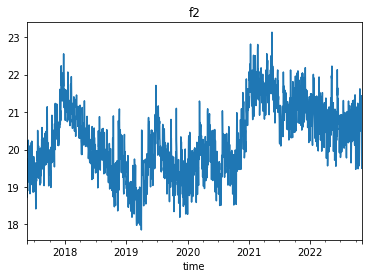

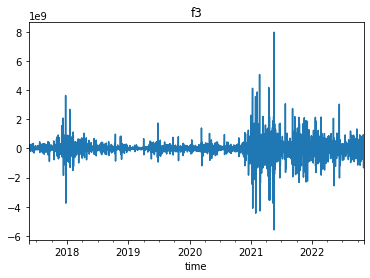

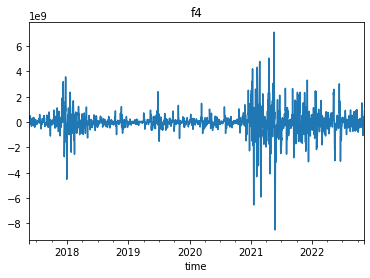

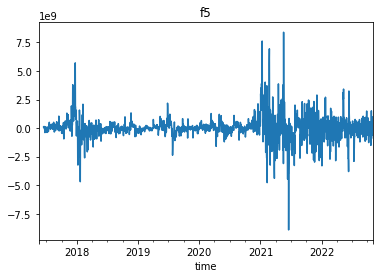

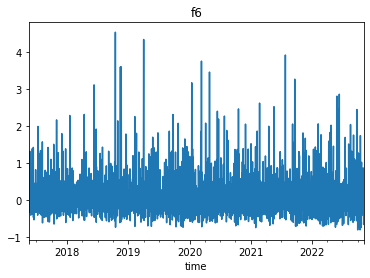

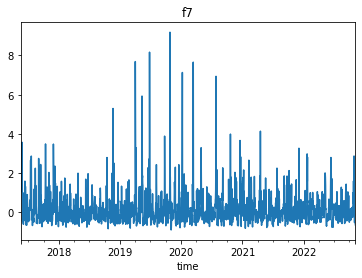

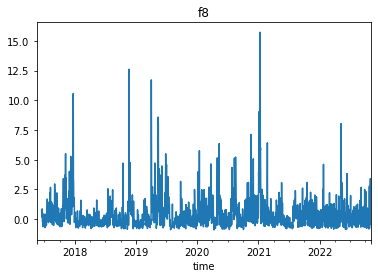

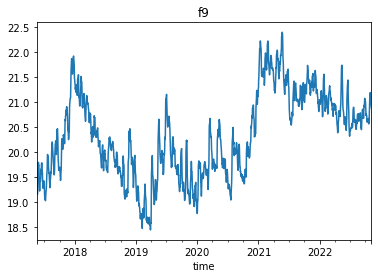

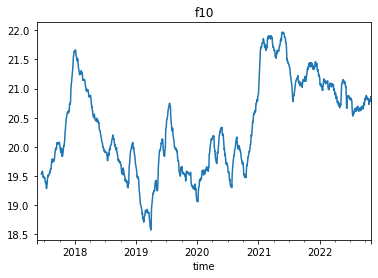

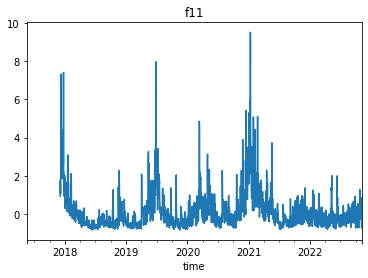

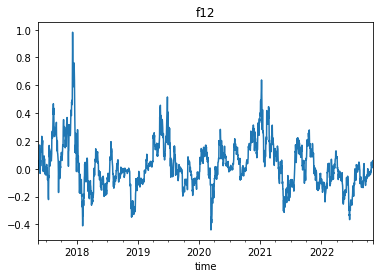

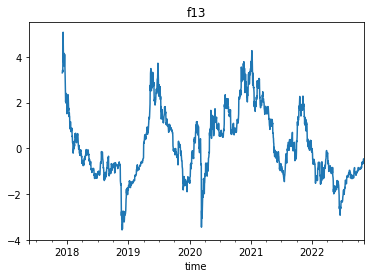

In [ ]:
# make plot for each features
for i in features.columns:
  features[i].plot()
  plt.title(i)
  plt.show()

# feature selection

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance

In [ ]:
features['prices'] = dataTable['close'] # the prices should be standardize together

In [ ]:
# stadardize the features dataframe
scaler = StandardScaler()
features_sc_np = scaler.fit_transform(features.dropna()) # drop na beforer scale
features_sc = pd.DataFrame(features_sc_np, index=features.dropna().index)
features_sc.columns = features.dropna().columns
features_sc.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,prices
time,,,,,,,,,,,,,,
2017-11-30,0.216115,1.081339,-0.848303,1.558578,1.213020,-0.603361,2.531464,1.163669,0.584637,0.388808,2.653011,2.298895,1.914381,-0.607220
2017-12-01,2.233909,0.758533,-0.702509,0.921921,0.488122,-0.639669,1.302316,0.153818,0.686447,0.408165,1.631186,2.906390,2.158386,-0.553748
2017-12-02,0.085446,0.384133,-0.586851,0.281391,-0.725862,-0.697687,0.172956,-0.598183,0.715897,0.379540,0.800387,2.776166,2.106353,-0.550751
2017-12-03,0.722064,0.778930,0.626946,0.726520,0.260009,0.542948,0.697166,-0.094515,0.788470,0.390018,1.627791,2.872317,2.143389,-0.531257
2017-12-04,0.801140,0.497461,-0.468711,0.038680,0.285850,-0.591100,-0.173172,0.009926,0.792310,0.401424,0.970818,2.989451,2.187233,-0.509177


In [ ]:
# isolate the price column from feature dataframe
prices_sc = features_sc.prices.to_frame().copy()
features_sc.drop(["prices"], axis='columns', inplace=True)
features_sc

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
time,,,,,,,,,,,,,
2017-11-30,0.216115,1.081339,-0.848303,1.558578,1.213020,-0.603361,2.531464,1.163669,0.584637,0.388808,2.653011,2.298895,1.914381
2017-12-01,2.233909,0.758533,-0.702509,0.921921,0.488122,-0.639669,1.302316,0.153818,0.686447,0.408165,1.631186,2.906390,2.158386
2017-12-02,0.085446,0.384133,-0.586851,0.281391,-0.725862,-0.697687,0.172956,-0.598183,0.715897,0.379540,0.800387,2.776166,2.106353
2017-12-03,0.722064,0.778930,0.626946,0.726520,0.260009,0.542948,0.697166,-0.094515,0.788470,0.390018,1.627791,2.872317,2.143389
2017-12-04,0.801140,0.497461,-0.468711,0.038680,0.285850,-0.591100,-0.173172,0.009926,0.792310,0.401424,0.970818,2.989451,2.187233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,-0.195729,0.683073,0.675731,0.038541,0.985898,0.755764,-0.179543,2.330254,0.938798,0.482380,0.044877,0.080605,-0.511972
2022-11-01,-0.045600,0.434980,-0.382960,-1.285630,0.516152,-0.550479,-0.822503,0.533068,0.824254,0.501336,-0.197044,0.070278,-0.508981
2022-11-02,-0.427725,1.095656,1.260214,-0.721710,0.763047,1.228771,-0.498018,0.250039,0.754657,0.528784,0.577210,-0.034613,-0.539527


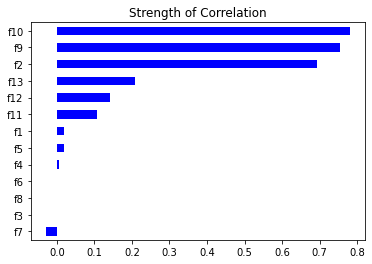

In [ ]:
# find the correlation for all features to the close price
corr = features_sc.corrwith(prices_sc.prices)
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

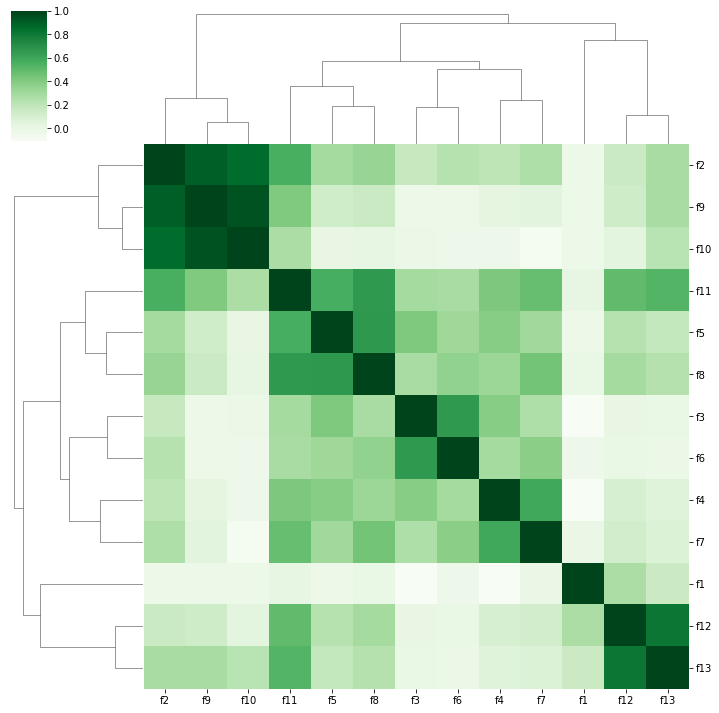

In [ ]:
# plot heatmap and find the correlation between each feature
corr_matrix = features_sc.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

In [ ]:
# the correlation value of each feature
corr

f1     0.018874
f2     0.692506
f3    -0.000457
f4     0.006436
f5     0.018624
f6     0.001491
f7    -0.029413
f8     0.001354
f9     0.754349
f10    0.781242
f11    0.105738
f12    0.141735
f13    0.206982
dtype: float64

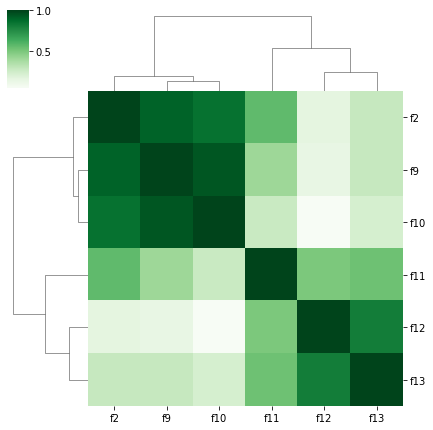

Correlation Strength:
f10    0.781242
f9     0.754349
f2     0.692506
f13    0.206982
f12    0.141735
f11    0.105738
dtype: float64


In [ ]:
# plot heatmap for the correlation value higher than 0.1
correlated_features = corr[corr>0.1].index.tolist()
corr_matrix = features_sc[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0.1].sort_values(ascending=False))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


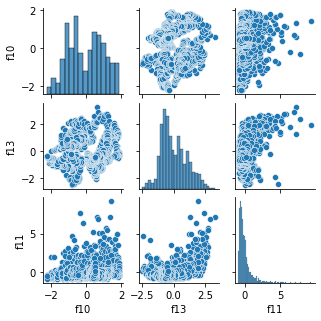

In [ ]:
# visualize the scatter plot of key features
selected_features = ['f10', 'f13', 'f11']
import seaborn as sns
sns.pairplot(features_sc[selected_features],size=1.5)

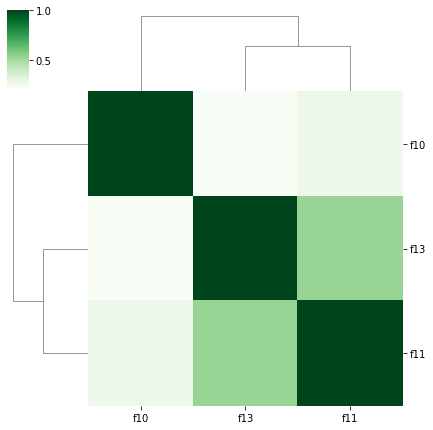

In [ ]:
# show heatmap for key features
corr_matrix = features_sc[selected_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns